In [1]:
import sys
sys.path.insert(1, '../library')
import New_ESN
import helpers
from sklearn.model_selection import TimeSeriesSplit
import yfinance as yf
import numpy as np

In [2]:
petra = yf.Ticker('PBR')
petra_historical = petra.history(period="max", interval="1wk")
petra_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-07 00:00:00-04:00,1.818993,2.098145,1.764963,2.057623,169068400,0.0,0.0
2000-08-14 00:00:00-04:00,2.026106,2.242224,2.017101,2.089141,43714800,0.0,0.0
2000-08-21 00:00:00-04:00,2.089140,2.179189,2.044115,2.179189,26162400,0.0,0.0
2000-08-28 00:00:00-04:00,2.188195,2.377298,2.147673,2.246727,27338400,0.0,0.0
2000-09-04 00:00:00-04:00,2.237722,2.453840,2.219712,2.359288,20408000,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,11.570000,14.460000,9.630000,11.290000,115001400,0.0,0.0
2023-01-30 00:00:00-05:00,11.490000,11.770000,10.730000,10.840000,125902700,0.0,0.0
2023-02-06 00:00:00-05:00,10.840000,11.570000,10.710000,11.530000,136987100,0.0,0.0


In [3]:
train_data = np.array(petra_historical[['Open','High','Low', 'Close']])[:-100]
test_data = np.array(petra_historical[['Open','High','Low', 'Close']])[-100:]
train_data.shape, test_data.shape

((1077, 4), (100, 4))

In [4]:
label_train_data = []
for i in range(len(train_data[:,-1])-1):
    label_train_data.append(np.hstack([train_data[i,-1],train_data[i+1,-1]]))
label_train_data = np.squeeze(label_train_data)
label_train_data.shape

(1076, 2)

In [5]:
label_test_data = []
for i in range(len(test_data[:,-1])-1):
    label_test_data.append(np.hstack([test_data[i,-1],test_data[i+1,-1]]))
label_test_data = np.squeeze(label_test_data)
label_test_data.shape

(99, 2)

In [6]:
size_input = train_data.shape[1]
size_output = label_train_data.shape[1]
size_reservoir = 200

In [7]:
esn = New_ESN.ESN(
                input_scaling = 1,
                epochs = 3,
                N_u = size_input,
                N_y = size_output,
                N_r = size_reservoir,
                sparsity = 0.2,
                alpha = 0.1, 
                beta = 0.5, 
                verbose = True, 
                method = 'ridge_regression',
                TF = True    
                )

W_reservoir.shape:  (200, 200)
W_in.shape:  (200, 4)
W_feedb.shape (200, 2)
W_out.shape:  (2, 205)


In [8]:
train_data[:-1,:].shape,label_train_data[1:,:].shape

((1076, 4), (1075, 2))

In [9]:
esn.fit(train_data[:-2,:],label_train_data[1:,:])

In [10]:
test_data[:-1,:].shape,label_test_data.shape

((99, 4), (99, 2))

In [11]:
results = esn.predict(test_data[:-1,:],label_test_data)

Prediction 0: [3.87033261 3.91349615]
Prediction 1: [3.89103526 3.96407752]
Prediction 2: [3.94327716 3.98712424]
Prediction 3: [4.04776019 4.03552318]
Prediction 4: [4.09679035 4.11142119]
Prediction 5: [4.24907777 4.20405469]
Prediction 6: [4.40600642 4.3630929 ]
Prediction 7: [4.37042318 4.39281641]
Prediction 8: [4.60251043 4.53321286]
Prediction 9: [4.98968008 4.85361873]
Prediction 10: [4.99372696 4.97360731]
Prediction 11: [5.11749357 5.10675516]
Prediction 12: [5.31112565 5.248311  ]
Prediction 13: [5.40370129 5.36721614]
Prediction 14: [5.27957974 5.28059401]
Prediction 15: [5.23753308 5.23350829]
Prediction 16: [5.22692028 5.22847837]
Prediction 17: [5.24084454 5.25009934]
Prediction 18: [5.51563842 5.42366057]
Prediction 19: [5.491228   5.49022114]
Prediction 20: [5.41405599 5.42069936]
Prediction 21: [5.70279557 5.62852053]
Prediction 22: [5.61437684 5.6408618 ]
Prediction 23: [5.60928466 5.5763888 ]
Prediction 24: [5.51777152 5.54110312]
Prediction 25: [5.63324225 5.548707

In [12]:
import matplotlib.pyplot as plt

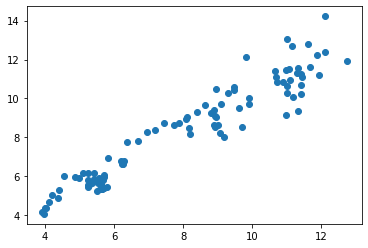

In [19]:
plt.scatter(np.squeeze(results)[:,-1], test_data[1:,-1])
plt.show()

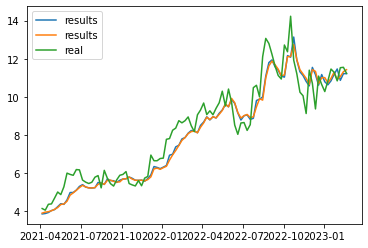

In [23]:
plt.plot(petra_historical.index[-99:],results, label = 'results')
plt.plot(petra_historical.index[-99:],test_data[1:,-1], label = 'real')
plt.legend()
plt.show()